In [12]:
import pandas as pd
import numpy as np

In [13]:
# Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [14]:
df = pd.read_csv('../drinking_water_potability.csv')
df.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


<Axes: xlabel='Potability'>

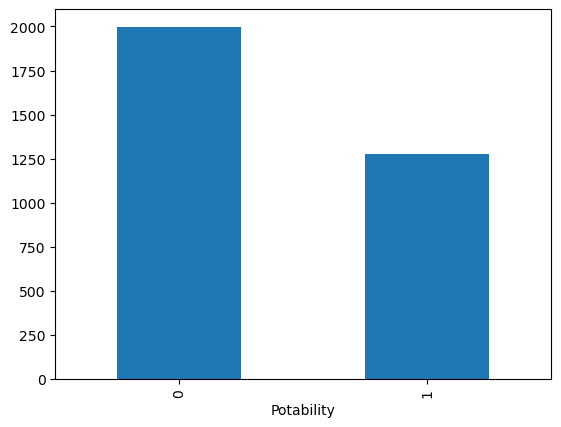

In [15]:
df['Potability'].value_counts().plot(kind='bar')

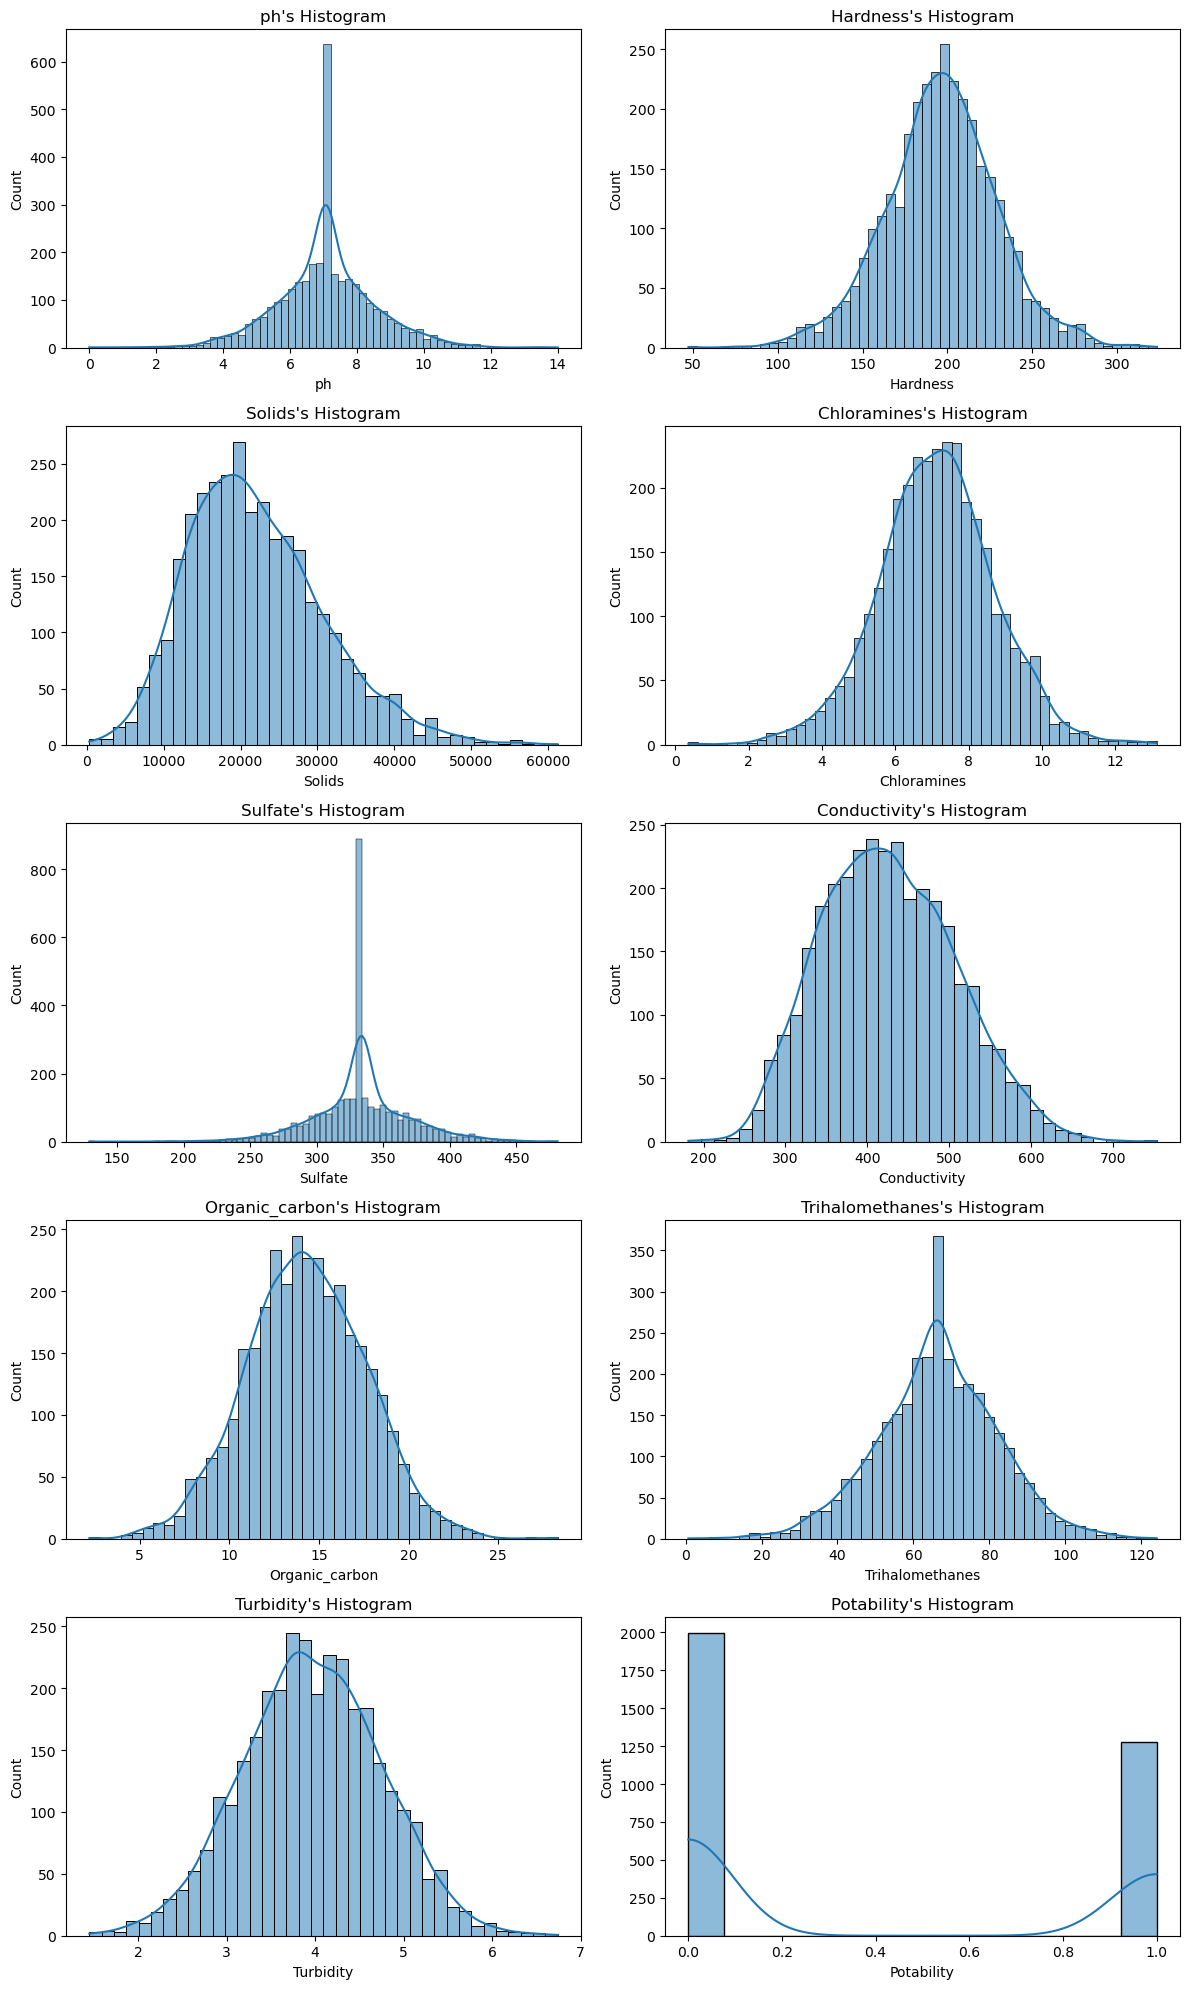

In [16]:
# Distribución de valores para cada característica.

plt.figure(figsize=(12,20))

for n, column in enumerate(df.columns):
    plt.subplot(5, 2, n+1)
    sns.histplot(df[column], kde=True)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f"{column}'s Histogram")

plt.tight_layout()
plt.show()

In [17]:
df = df.dropna().reset_index(drop=True)
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.80216,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.57822,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.86938,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [18]:
# Imputación
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Inicializar el imputador iterativo
imputer = IterativeImputer()

# Entrenar el imputador en los datos con valores faltantes
imputer.fit(df)

# Transformar los datos para imputar los valores faltantes
df_imputed = pd.DataFrame(imputer.transform(df), columns=df.columns)

# Verificar que no hay valores faltantes después de la imputación
print("Valores faltantes después de la imputación:")
print(df_imputed.isnull().sum())

# Outliers

from sklearn.ensemble import IsolationForest

# Seleccionar solo las columnas numéricas
numeric_columns = df_imputed.select_dtypes(include=['float64', 'int64'])

# Inicializar y ajustar el modelo Isolation Forest
clf = IsolationForest(random_state=0)
clf.fit(numeric_columns)

# Identificar los valores atípicos (1 para valores normales, -1 para valores atípicos)
outliers = clf.predict(numeric_columns)

# Filtrar solo los valores normales (no atípicos)
df_cleaned = df_imputed[outliers == 1]

# Normalizacion

from sklearn.preprocessing import MinMaxScaler

# Seleccionar las características numéricas
numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64'])

scaler = MinMaxScaler()

numeric_columns_scaled = scaler.fit_transform(numeric_columns)

df_scaled = pd.DataFrame(numeric_columns_scaled, columns=numeric_columns.columns)

# Balanceo de datos
from imblearn.over_sampling import RandomOverSampler

# Seleccionar tus características y la variable objetivo
X = df_scaled.drop('Potability', axis=1)  # Asegúrate de cambiar 'target_variable' por el nombre de tu variable objetivo
y = df_scaled['Potability']

# Inicializar el objeto RandomOverSampler
oversampler = RandomOverSampler(random_state=0)

# Aplicar el sobremuestreo a tus datos
X_resampled, y_resampled = oversampler.fit_resample(X, y)

Valores faltantes después de la imputación:
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [19]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (3014, 9)
X_test shape: (754, 9)


           feature  importance       std
0               ph    0.127395  0.018392
1         Hardness    0.122393  0.017325
4          Sulfate    0.115309  0.016348
3      Chloramines    0.114821  0.017601
2           Solids    0.114441  0.016521
6   Organic_carbon    0.105554  0.016581
5     Conductivity    0.102732  0.016001
8        Turbidity    0.099132  0.016055
7  Trihalomethanes    0.098223  0.016080


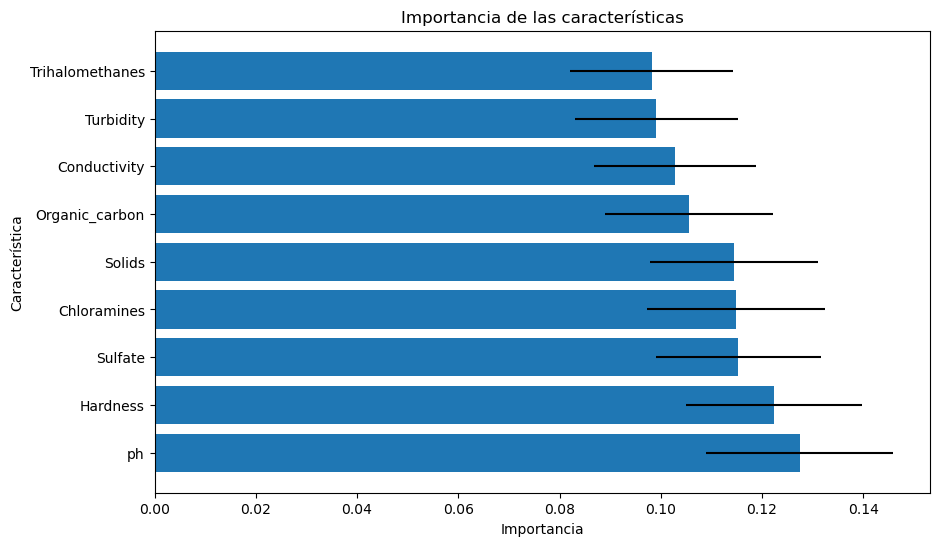

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000, random_state=2)
rf.fit(X_train, y_train)

# Obtener la importancia de las características
importances = rf.feature_importances_

# Obtener la desviación estándar de las importancias de las características
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

# Crear un DataFrame con las características y sus importancias
df_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importances, 'std': std})

# Ordenar el DataFrame por importancia
df_importances = df_importances.sort_values('importance', ascending=False)

print(df_importances)
plt.figure(figsize=(10, 6))
plt.barh(df_importances['feature'], df_importances['importance'], xerr=df_importances['std'], align='center')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las características')
plt.show()

select_features=df_importances[df_importances.importance>=0.05].feature

# Creación del modelo

In [21]:
# Seleccionar los modelos, ajustar los datos y medir su rendimiento de clasificación.
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)

LR = LogisticRegression()
LR.fit(X_train, y_train)

RF = RandomForestClassifier()
RF.fit(X_train, y_train)

GNB = GaussianNB()
GNB.fit(X_train, y_train)

models = [KNN, LR, RF, GNB]

train_acc = []
test_acc = []
train_logloss = []
test_logloss = []
train_rocauc = []
test_rocauc = []

for model in models:
    y_train_hat = model.predict(X_train)
    y_test_hat = model.predict(X_test)
    train_acc.append(round(accuracy_score(y_train, y_train_hat)*100, 2))
    test_acc.append(round(accuracy_score(y_test, y_test_hat)*100, 2))
    train_logloss.append(log_loss(y_train, y_train_hat))
    test_logloss.append(log_loss(y_test, y_test_hat))
    train_rocauc.append(round(roc_auc_score(y_train, y_train_hat), 2))
    test_rocauc.append(round(roc_auc_score(y_test, y_test_hat), 2))

metrics = pd.DataFrame({'Train Accuracy %': train_acc, 'Test Accuracy %': test_acc, 'Train Log Loss': train_logloss,
                       'Test Log Loss': test_logloss, 'Train ROC AUC': train_rocauc, 'Test ROC AUC': test_rocauc}, 
                   index=['K-Nearest Neighbor', 'Logistic Regression','Random Forest', 'Gaussian Naive Bayes'])
metrics

,Train Accuracy %,Test Accuracy %,Train Log Loss,Test Log Loss,Train ROC AUC,Test ROC AUC
K-Nearest Neighbor,76.31,62.33,8.538543e+00,13.576124,0.76,0.62
Logistic Regression,51.73,50.93,1.739997e+01,17.687204,0.52,0.51
Random Forest,100.00,78.91,2.220446e-16,7.600717,1.00,0.79
Gaussian Naive Bayes,56.50,55.44,1.567791e+01,16.061893,0.56,0.56


# Tuning de hiperparametros

In [22]:
# Especificar hiperparametros del grid

n_estimators = list(range(200, 2000, 200))
max_depth = list(range(10, 110, 10))
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

param_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [23]:
# Entrenamiento de búsqueda aleatoria: aquí se probarán 100 parámetros diferentes con K-Fold de 3, lo que equivale a 300 iteraciones en total.

RF_random = RandomizedSearchCV(estimator = RF, param_distributions = param_grid, 
                               n_iter = 5, cv = 3, verbose=0, random_state=1984, n_jobs = -1)

RF_random.fit(X_train, y_train)

print(RF_random.best_params_)

{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 100, 'bootstrap': False}


In [24]:
# Ahora, utilizando los mejores parámetros encontrados en la búsqueda aleatoria, compararemos su rendimiento con el primer modelo.

RF = RandomForestClassifier(n_estimators=1200, min_samples_split=5, min_samples_leaf=4, max_depth=50, bootstrap=True)
RF.fit(X_train, y_train)

y_train_hat = RF.predict(X_train)
y_test_hat = RF.predict(X_test)

train_acc.append(round(accuracy_score(y_train, y_train_hat)*100, 2))
test_acc.append(round(accuracy_score(y_test, y_test_hat)*100, 2))
train_logloss.append(log_loss(y_train, y_train_hat))
test_logloss.append(log_loss(y_test, y_test_hat))
train_rocauc.append(round(roc_auc_score(y_train, y_train_hat), 2))
test_rocauc.append(round(roc_auc_score(y_test, y_test_hat), 2))

metrics = pd.DataFrame({'Train Accuracy %': train_acc, 'Test Accuracy %': test_acc, 'Train Log Loss': train_logloss,
                       'Test Log Loss': test_logloss, 'Train ROC AUC': train_rocauc, 'Test ROC AUC': test_rocauc}, 
                   index=['K-Nearest Neighbor', 'Logistic Regression','Random Forest', 'Gaussian Naive Bayes', 'Random Forest Tuned'])
metrics

,Train Accuracy %,Test Accuracy %,Train Log Loss,Test Log Loss,Train ROC AUC,Test ROC AUC
K-Nearest Neighbor,76.31,62.33,8.538543e+00,13.576124,0.76,0.62
Logistic Regression,51.73,50.93,1.739997e+01,17.687204,0.52,0.51
Random Forest,100.00,78.91,2.220446e-16,7.600717,1.00,0.79
Gaussian Naive Bayes,56.50,55.44,1.567791e+01,16.061893,0.56,0.56
Random Forest Tuned,99.37,77.59,2.272161e-01,8.078750,0.99,0.78
